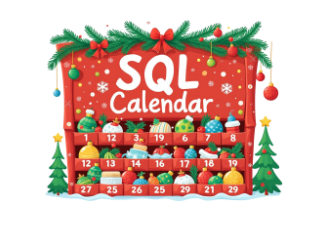

Day 1

Today's Question:

A ski resort company want to know which customers rented ski equipment for more than one type of activity (e.g., skiing and snowboarding). List the customer names and the number of distinct activities they rented equipment for.

Table name: rentals

rental_id	| customer_name	| activity	| rental_date

1 Emily	Skiing	2024-01-01

2	Michael	Snowboarding	2024-01-02

3	Emily	Snowboarding	2024-01-03

4	Sarah	Skiing	2024-01-01

5	Michael	Skiing	2024-01-02

6	Michael	Snowtubing	2024-01-02

In [ ]:
select
    customer_name,
    count(distinct activity)
from rentals
group by customer_name
having count(distinct activity) > 1
;

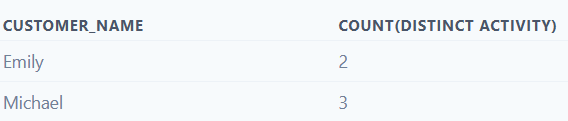

Day 2

Today's Question:

Santa wants to know which gifts weigh more than 1 kg. Can you list them?

Table name: gifts

gift_name	| recipient	| weight_kg

Toy Train	John	2.5

Chocolate Box	Alice	0.8

Teddy Bear	Sophia	1.2
Board Game	Liam	0.9

In [ ]:
select
    gift_name
from gifts
where weight_kg > 1
;

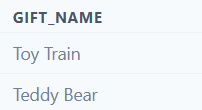

Day 3

Today's Question:

You’re trying to identify the most calorie-packed candies to avoid during your holiday binge. Write a query to rank candies based on their calorie count within each category. Include the candy_name, candy_category, calories, and rank (rank_in_category) within the category.

Table name: candy_nutrition

candy_id	candy_name	calories	candy_category

1	Candy Cane	200	Sweets

2	Chocolate Bar	250	Chocolate

3	Gingerbread Cookie	150	Baked Goods

4	Lollipop	100	Sweets

5	Dark Chocolate Truffle	180	Chocolate

6	Marshmallow	900	Sweets

7	Sugar Cookie	140	Baked Goods

In [ ]:
select
    candy_name,
    candy_category,
    calories,
    RANK() OVER (PARTITION BY candy_category
        ORDER BY calories DESC) as rank_in_category
from candy_nutrition
order by calories DESC
;

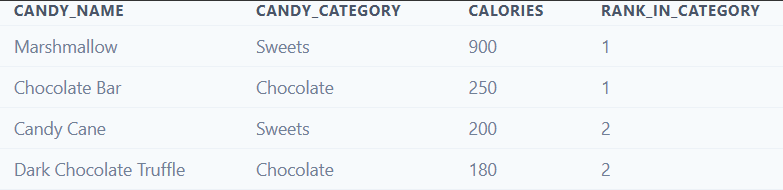

Day 4

Today's Question:

You’re planning your next ski vacation and want to find the best regions with heavy snowfall. Given the tables resorts and snowfall, find the average snowfall for each region and sort the regions in descending order of average snowfall. Return the columns region and average_snowfall.

Table name: ski_resorts

resort_id	resort_name	region

1	Snowy Peaks	Rocky Mountains

2	Winter Wonderland	Wasatch Range

3	Frozen Slopes	Alaska Range

4	Powder Paradise	Rocky Mountains

Table name: snowfall

resort_id	snowfall_inches

1	60

2	45

3	75

4	55

In [ ]:
select
    sk.region as region,
    AVG(sn.snowfall_inches) as average_snowfall
from ski_resorts sk
join snowfall sn on sk.resort_id = sn.resort_id
group by region
order by average_snowfall DESC
;

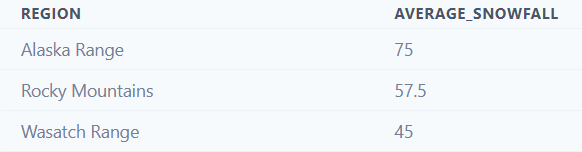

Day 5

Today's Question:

This year, we're celebrating Christmas in the Southern Hemisphere! Which beaches are expected to have temperatures above 30°C on Christmas Day?

Table name: beach_temperature_predictions

beach_name	country	expected_temperature_c	date

Bondi Beach	Australia	32	2024-12-24

Copacabana Beach	Brazil	28	2024-12-24

Clifton Beach	South Africa	31	2024-12-25

Brighton Beach	New Zealand	25	2024-12-25

In [ ]:
select
    beach_name
from beach_temperature_predictions
where expected_temperature_c > 30
    and date = '2024-12-25'
;

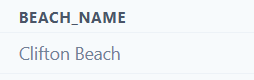

Day 6

Today's Question:

Scientists are tracking polar bears across the Arctic to monitor their migration patterns and caloric intake. Write a query to find the top 3 polar bears that have traveled the longest total distance in December 2024. Include their bear_id, bear_name, and total_distance_traveled in the results.

Table name: polar_bears

bear_id	bear_name	age

1	Snowball	10

2	Frosty	7

3	Iceberg	15

4	Chilly	5

Table name: tracking

tracking_id	bear_id	distance_km	date

1	1	25	2024-12-01

2	2	40	2024-12-02

3	1	30	2024-12-03

4	3	50	2024-12-04

5	2	35	2024-12-05

6	4	20	2024-12-06

7	3	55	2024-12-07

8	1	45	2024-12-08

In [ ]:
select
    p.bear_id,
    p.bear_name,
    sum(distance_km) as total_distance_traveled
from polar_bears p
join tracking t on p.bear_id = t.bear_id
where strftime('%m', date) = '12' and strftime('%Y', date) =  '2024'
group by p.bear_id, p.bear_name
order by total_distance_traveled DESC
limit 3
;

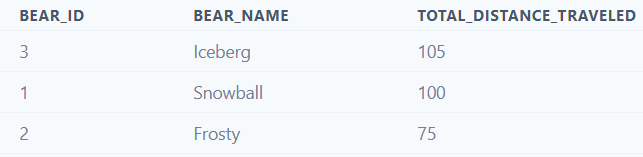

Day 7

Today's Question:

The owner of a winter market wants to know which vendors have generated the highest revenue overall. For each vendor, calculate the total revenue for all their items and return a list of the top 2 vendors by total revenue. Include the vendor_name and total_revenue in your results.

Table name: vendors

vendor_id	vendor_name	market_location

1	Cozy Crafts	Downtown Square

2	Sweet Treats	Central Park

3	Winter Warmers	Downtown Square

Table name: sales

sale_id	vendor_id	item_name	quantity_sold	price_per_unit

1	1	Knitted Scarf	15	25

2	2	Hot Chocolate	50	3.5

3	3	Wool Hat	20	18

4	1	Handmade Ornament	10	15

5	2	Gingerbread Cookie	30	5

In [ ]:
select
    v.vendor_name as vendor_name,
    sum(s.quantity_sold * s.price_per_unit) as total_revenue
from vendors v
join sales s on v.vendor_id = s.vendor_id
group by vendor_name
order by total_revenue DESC
limit 2
;

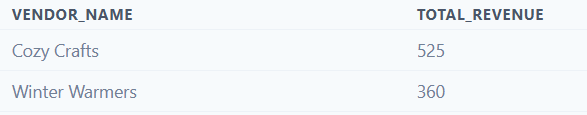

Day 8

Today's Question:

You are managing inventory in Santa's workshop. Which gifts are meant for "good" recipients? List the gift name and its weight.

Table name: gifts

gift_id	gift_name	recipient_type	weight_kg

1	Toy Train	good	2.5

2	Lumps of Coal	naughty	1.5

3	Teddy Bear	good	1.2

4	Chocolate Bar	good	0.3

5	Board Game	naughty	1.8

In [ ]:
select
    gift_name,
    weight_kg
from gifts
where recipient_type = 'good'
;

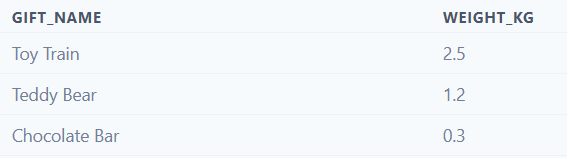

Day 9

Today's Question:

A community is hosting a series of festive feasts, and they want to ensure a balanced menu. Write a query to identify the top 3 most calorie-dense dishes (calories per gram) served for each event. Include the dish_name, event_name, and the calculated calorie density in your results.

Table name: events

event_id	event_name

1	Christmas Eve Dinner

2	New Years Feast

3	Winter Solstice Potluck

Table name: menu

dish_id	dish_name	event_id	calories	weight_g

1	Roast Turkey	1	3500	5000

2	Chocolate Yule Log	1	2200	1000

3	Cheese Fondue	2	1500	800

4	Holiday Fruitcake	3	4000	1200

5	Honey Glazed Ham	2	2800	3500


In [ ]:
WITH rank_dishes as
(select
    m.dish_name as dish_name,
    e.event_name as event_name,
    m.calories / m.weight_g as calorie_density,
    RANK() over (partition by e.event_name
        order by m.calories / m.weight_g DESC) as rank_dish
from events e
join menu m on e.event_id = m.event_id
)
select
    dish_name,
    event_name,
    calorie_density
from rank_dishes
where rank_dish <=3
order by calorie_density DESC
;

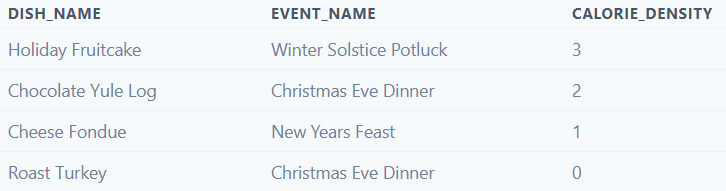

Day 10

Today's Question:

You are tracking your friends' New Year’s resolution progress. Write a query to calculate the following for each friend: number of resolutions they made, number of resolutions they completed, and success percentage (% of resolutions completed) and a success category based on the success percentage:
- Green: If success percentage is greater than 75%.
- Yellow: If success percentage is between 50% and 75% (inclusive).
- Red: If success percentage is less than 50%.

Table name: resolutions

resolution_id	friend_name	resolution	is_completed

1	Alice	Exercise daily	1

2	Alice	Read 20 books	0

3	Bob	Save money	0

4	Bob	Eat healthier	1

5	Charlie	Travel more	1

6	Charlie	Learn a new skill	1

7	Diana	Volunteer monthly	1

8	Diana	Drink more water	0

9	Diana	Sleep 8 hours	1

In [ ]:
select
    friend_name,
    count(resolution) as resolutions_made,
    sum(is_completed) as resolutions_completed,
    sum(is_completed) / count(resolution) * 100 as success_percentage,
    case
        when (sum(is_completed) / count(resolution) * 100) > 75 then 'Green'
        when (sum(is_completed) / count(resolution) * 100) >= 50 then 'Yellow'
        else 'Red' end as success_category
from resolutions
group by friend_name
;

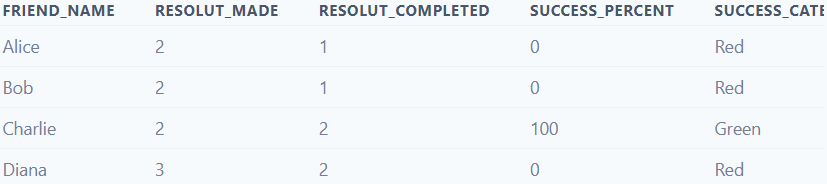

Day 11

Today's Question:

You are preparing holiday gifts for your family. Who in the family_members table are celebrating their birthdays in December 2024? List their name and birthday.

Table name: family_members

member_id	name	relationship	birthday

1	Dawn	Sister	2024-12-24

2	Bob	Father	2024-05-20

3	Charlie	Brother	2024-12-25

4	Diana	Mother	2024-03-15

In [ ]:
select
    name,
    birthday
from family_members
where STRFTIME('%Y', birthday) = '2024'
    and STRFTIME('%m', birthday) = '12'
;

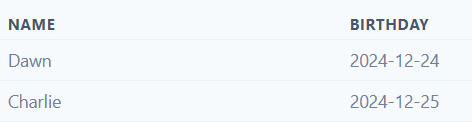

Day 12

Today's Question:

A collector wants to identify the top 3 snow globes with the highest number of figurines. Write a query to rank them and include their globe_name, number of figurines, and material.

Table name: snow_globes

globe_id	globe_name	volume_cm3	material

1	Winter Wonderland	500	Glass

2	Santas Workshop	300	Plastic

3	Frozen Forest	400	Glass

4	Holiday Village	600	Glass

Table name: figurines

figurine_id	globe_id	figurine_type

1	1	Snowman

2	1	Tree

3	2	Santa Claus

4	2	Elf

5	2	Gift Box

6	3	Reindeer

7	3	Tree

8	4	Snowman

9	4	Santa Claus

10	4	Tree

11	4	Elf

12	4	Gift Box

In [ ]:
select
    s.globe_name,
    count(f.figurine_id) as num_figurines,
    s.material
from snow_globes s
left join figurines f on s.globe_id = f.globe_id
group by s.globe_name
order by num_figurines DESC
limit 3
;

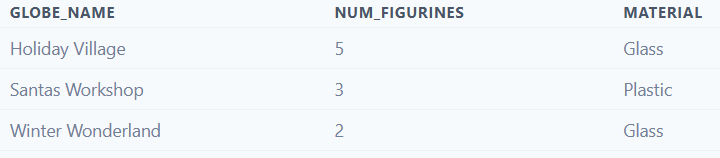